# Detailed analysis of earthquakes which have happened in Japan between 2001-2018

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries are imported")

Libraries are imported


In [2]:
data = pd.read_csv("Japan earthquakes 2001 - 2018.csv", sep = ',')
data.head()

time  latitude  longitude  depth  mag magType  nst  \
0  2018-11-27T14:34:20.900Z   48.3780   154.9620  35.00  4.9      mb  NaN   
1  2018-11-26T23:33:50.630Z   36.0733   139.7830  48.82  4.8     mww  NaN   
2  2018-11-26T13:04:02.250Z   38.8576   141.8384  50.56  4.5      mb  NaN   
3  2018-11-26T05:20:16.440Z   50.0727   156.1420  66.34  4.6      mb  NaN   
4  2018-11-25T09:19:05.010Z   33.9500   134.4942  38.19  4.6      mb  NaN   

     gap   dmin   rms  ...                   updated  \
0   92.0  5.044  0.63  ...  2018-11-27T16:06:33.040Z   
1  113.0  1.359  1.13  ...  2018-11-27T16:44:22.223Z   
2  145.0  1.286  0.84  ...  2018-11-26T23:52:21.074Z   
3  128.0  3.191  0.62  ...  2018-11-26T08:13:58.040Z   
4  104.0  0.558  0.61  ...  2018-11-25T23:24:52.615Z   

                                  place        type horizontalError  \
0  269km SSW of Severo-Kuril'sk, Russia  earthquake             7.6   
1               3km SSW of Sakai, Japan  earthquake             6.0   
2            26km SSE of Ofunato, Japan  earthquake             8.4   
3     67km S of Severo-Kuril'sk, Russia  earthquake             9.7   
4         9km SW of Komatsushima, Japan  earthquake             3.4   

  depthError  magError  magNst    status  locationSource magSource  
0        1.7     0.036   248.0  reviewed              us        us  
1        6.1     0.071    19.0  reviewed              us        us  
2        9.5     0.156    12.0  reviewed              us        us  
3        7.8     0.045   151.0  reviewed              us        us  
4       10.1     0.132    17.0  reviewed              us        us  

[5 rows x 22 columns]

#### Data checking

In [3]:
data.shape

(14092, 22)

In [4]:
data.dtypes.value_counts()

float64    12
object     10
dtype: int64

In [5]:
data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [6]:
data.isna().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                 3609
gap                  782
dmin               10485
rms                   78
net                    0
id                     0
updated                0
place                  0
type                   0
horizontalError    11292
depthError          5052
magError           10661
magNst              3044
status                 0
locationSource         0
magSource              0
dtype: int64

In [7]:
df = data.copy() # in case if we want to rollback
df["datetime"] = pd.to_datetime(df["time"])

df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour

df.head()

time  latitude  longitude  depth  mag magType  nst  \
0  2018-11-27T14:34:20.900Z   48.3780   154.9620  35.00  4.9      mb  NaN   
1  2018-11-26T23:33:50.630Z   36.0733   139.7830  48.82  4.8     mww  NaN   
2  2018-11-26T13:04:02.250Z   38.8576   141.8384  50.56  4.5      mb  NaN   
3  2018-11-26T05:20:16.440Z   50.0727   156.1420  66.34  4.6      mb  NaN   
4  2018-11-25T09:19:05.010Z   33.9500   134.4942  38.19  4.6      mb  NaN   

     gap   dmin   rms  ... magError magNst    status locationSource magSource  \
0   92.0  5.044  0.63  ...    0.036  248.0  reviewed             us        us   
1  113.0  1.359  1.13  ...    0.071   19.0  reviewed             us        us   
2  145.0  1.286  0.84  ...    0.156   12.0  reviewed             us        us   
3  128.0  3.191  0.62  ...    0.045  151.0  reviewed             us        us   
4  104.0  0.558  0.61  ...    0.132   17.0  reviewed             us        us   

                          datetime  year  month  day hour  
0 2018-11-27 14:34:20.900000+00:00  2018     11   27   14  
1 2018-11-26 23:33:50.630000+00:00  2018     11   26   23  
2 2018-11-26 13:04:02.250000+00:00  2018     11   26   13  
3 2018-11-26 05:20:16.440000+00:00  2018     11   26    5  
4 2018-11-25 09:19:05.010000+00:00  2018     11   25    9  

[5 rows x 27 columns]

In [8]:
df.drop(['time'], axis = 1, inplace = True)
df.head()

latitude  longitude  depth  mag magType  nst    gap   dmin   rms net  ...  \
0   48.3780   154.9620  35.00  4.9      mb  NaN   92.0  5.044  0.63  us  ...   
1   36.0733   139.7830  48.82  4.8     mww  NaN  113.0  1.359  1.13  us  ...   
2   38.8576   141.8384  50.56  4.5      mb  NaN  145.0  1.286  0.84  us  ...   
3   50.0727   156.1420  66.34  4.6      mb  NaN  128.0  3.191  0.62  us  ...   
4   33.9500   134.4942  38.19  4.6      mb  NaN  104.0  0.558  0.61  us  ...   

  magError magNst    status locationSource  magSource  \
0    0.036  248.0  reviewed             us         us   
1    0.071   19.0  reviewed             us         us   
2    0.156   12.0  reviewed             us         us   
3    0.045  151.0  reviewed             us         us   
4    0.132   17.0  reviewed             us         us   

                          datetime  year  month day hour  
0 2018-11-27 14:34:20.900000+00:00  2018     11  27   14  
1 2018-11-26 23:33:50.630000+00:00  2018     11  26   23  
2 2018-11-26 13:04:02.250000+00:00  2018     11  26   13  
3 2018-11-26 05:20:16.440000+00:00  2018     11  26    5  
4 2018-11-25 09:19:05.010000+00:00  2018     11  25    9  

[5 rows x 26 columns]

## Exploratory Data Analysis

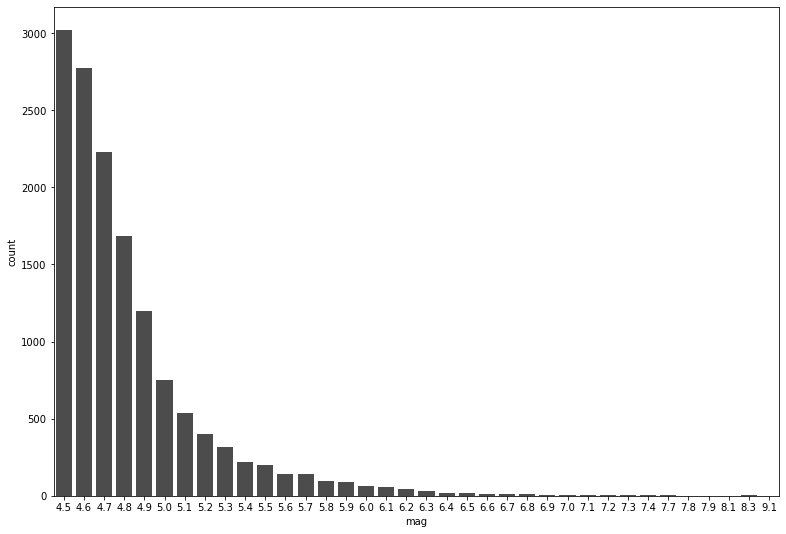

In [9]:
plt.figure(figsize = (13,9))
sns.countplot(data = df, x = 'mag', color = 'black', alpha = 0.7)
plt.show()

In [10]:
len(df.year.unique())

18

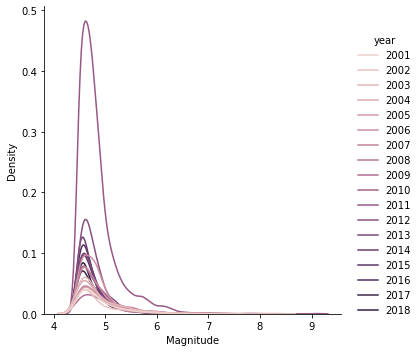

In [11]:
sns.displot(data = df, x = 'mag', hue = 'year', kind = 'kde')
plt.xlabel('Magnitude')
plt.show()

* Magnitudes around 4 - 5 are frequent

In [12]:
y = df.groupby('year').count().reset_index()
y.head()

year  latitude  longitude  depth  mag  magType  nst  gap  dmin  rms  ...  \
0  2001       388        388    388  388      388  388    0     0  388  ...   
1  2002       353        353    353  353      353  353    0     0  353  ...   
2  2003       557        557    557  557      557  557  518     0  557  ...   
3  2004       518        518    518  518      518  518  518     0  518  ...   
4  2005       423        423    423  423      423  423  423     0  417  ...   

   depthError  magError  magNst  status  locationSource  magSource  datetime  \
0          70         0     303     388             388        388       388   
1          82         0     281     353             353        353       353   
2          83         0     440     557             557        557       557   
3         223         0     275     518             518        518       518   
4         181         0     158     423             423        423       423   

   month  day  hour  
0    388  388   388  
1    353  353   353  
2    557  557   557  
3    518  518   518  
4    423  423   423  

[5 rows x 26 columns]

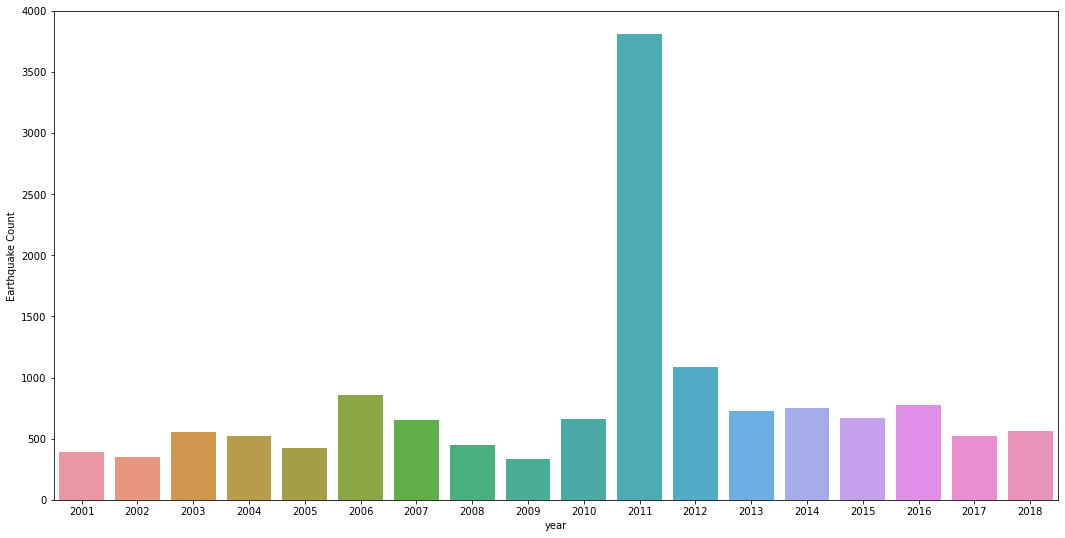

In [13]:
plt.figure(figsize = (18,9))
sns.barplot(data = y, x = 'year', y = y['place'])
plt.ylabel('Earthquake Count')
plt.show()

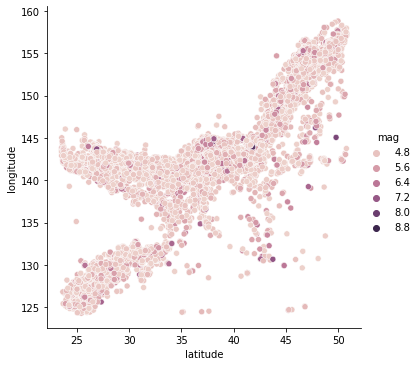

In [14]:
sns.relplot(data = df, x = 'latitude', y = 'longitude', hue = 'mag')

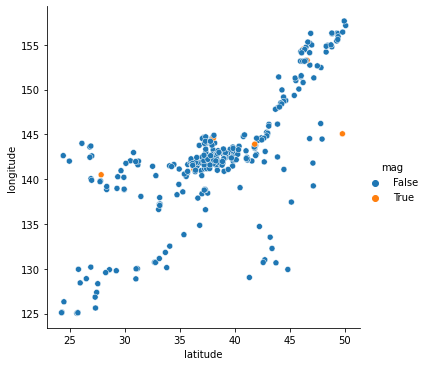

In [15]:
df_6 = df[df['mag'] > 5.99]
threshold = df['mag'] > 7.5
sns.relplot(data = df_6, x = 'latitude', y = 'longitude', hue = threshold)

* Is there an even relation?

<Figure size 1800x648 with 0 Axes>

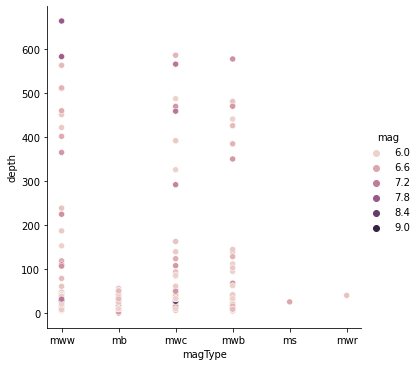

In [16]:
plt.figure(figsize = (25,9))
sns.relplot(x="magType", y="depth", hue="mag", kind="scatter", data=df_6);

<Figure size 1800x648 with 0 Axes>

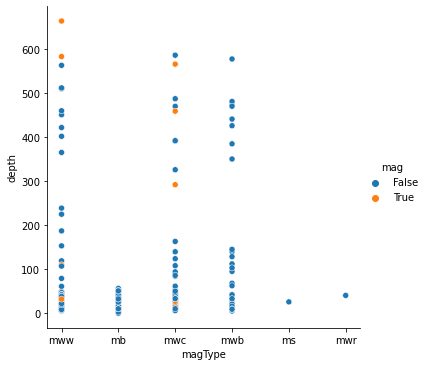

In [17]:
plt.figure(figsize = (25,9))
threshold = df['mag'] > 7.0
sns.relplot(x="magType", y="depth", hue = threshold, kind="scatter", data=df_6);

* Deeper = Bigger magnitude? (Threshold = 7.0)

In [18]:
df_6.describe()

latitude   longitude       depth         mag         nst         gap  \
count  302.000000  302.000000  302.000000  302.000000  251.000000  282.000000   
mean    38.423459  142.479009   73.051291    6.366887  478.529880   33.403901   
std      6.109294    6.749461  132.067458    0.451093  165.130573   24.608809   
min     24.233000  125.043000    0.000000    6.000000   40.000000    8.000000   
25%     35.996500  140.848000   13.250000    6.100000  394.000000   18.000000   
50%     38.138500  142.276500   29.000000    6.200000  491.000000   25.600000   
75%     42.723525  144.513000   42.675000    6.500000  583.000000   40.325000   
max     50.099000  157.652000  664.000000    9.100000  929.000000  185.900000   

            dmin         rms  horizontalError  depthError   magError  \
count  51.000000  301.000000        39.000000  104.000000  12.000000   
mean    2.256118    0.895415         6.143590    4.700962   0.051417   
std     1.383710    0.157948         1.592548    3.858152   0.012638   
min     0.271000    0.470000         1.400000    1.400000   0.020000   
25%     1.095500    0.800000         5.050000    1.800000   0.046750   
50%     2.208000    0.860000         6.300000    3.000000   0.053000   
75%     3.217500    0.980000         6.950000    6.825000   0.059250   
max     5.885000    1.480000         9.200000   20.400000   0.068000   

           magNst         year       month         day        hour  
count   50.000000   302.000000  302.000000  302.000000  302.000000  
mean   141.660000  2009.344371    6.321192   15.086093   11.205298  
std    150.866289     4.233306    3.321052    7.750632    6.755156  
min     15.000000  2001.000000    1.000000    1.000000    0.000000  
25%     34.500000  2006.000000    3.000000   10.000000    6.000000  
50%     89.000000  2011.000000    6.000000   14.000000   10.000000  
75%    211.250000  2011.000000    9.000000   21.000000   17.750000  
max    941.000000  2018.000000   12.000000   31.000000   23.000000

In [19]:
df_6.loc[df_6['mag'] == 9.1]

latitude  longitude  depth  mag magType    nst  gap  dmin   rms  \
8593    38.297    142.373   29.0  9.1     mww  541.0  9.5   NaN  1.16   

           net  ... magError magNst    status locationSource  magSource  \
8593  official  ...      NaN    NaN  reviewed             us   official   

                             datetime  year  month day hour  
8593 2011-03-11 05:46:24.120000+00:00  2011      3  11    5  

[1 rows x 26 columns]

* Analyse biggest earthquake March 11.

In [20]:
df_2011 = df[(df['year'] == 2011) & (df['month'] == 2)]
df_2011.reset_index(drop = True, inplace = True)
df_2011.head()

latitude  longitude  depth  mag magType    nst    gap  dmin   rms net  ...  \
0    27.635    139.828  488.7  4.7      mb  148.0   43.4   NaN  0.80  us  ...   
1    46.216    152.142   28.3  5.1     mwc  169.0   93.7   NaN  0.97  us  ...   
2    35.640    143.749   10.0  4.6      mb   21.0  135.5   NaN  1.14  us  ...   
3    32.356    142.384   26.5  5.1      mb  145.0   47.7   NaN  0.88  us  ...   
4    32.085    131.672   40.8  4.7      mb   55.0  118.2   NaN  0.98  us  ...   

  magError magNst    status locationSource  magSource  \
0      NaN   54.0  reviewed             us         us   
1      NaN    NaN  reviewed             us       gcmt   
2      NaN    2.0  reviewed             us         us   
3      NaN   53.0  reviewed             us         us   
4      NaN   14.0  reviewed             us         us   

                          datetime  year  month day hour  
0 2011-02-28 16:35:49.440000+00:00  2011      2  28   16  
1 2011-02-28 13:05:28.690000+00:00  2011      2  28   13  
2 2011-02-28 09:55:23.480000+00:00  2011      2  28    9  
3 2011-02-28 02:03:26.190000+00:00  2011      2  28    2  
4 2011-02-28 00:04:34.420000+00:00  2011      2  28    0  

[5 rows x 26 columns]

* Earthquakes happened before 2011 March, might give a signal that it was coming?

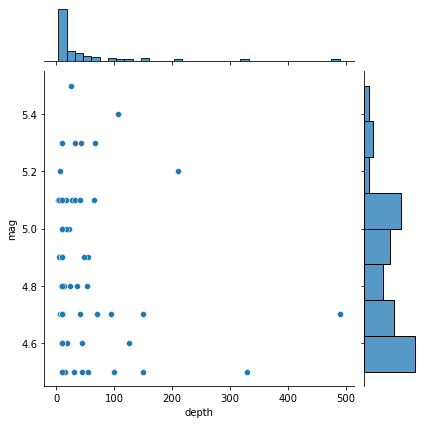

In [21]:
sns.jointplot(x='depth',y='mag',data=df_2011)

Text(0.5, 0, 'Day')

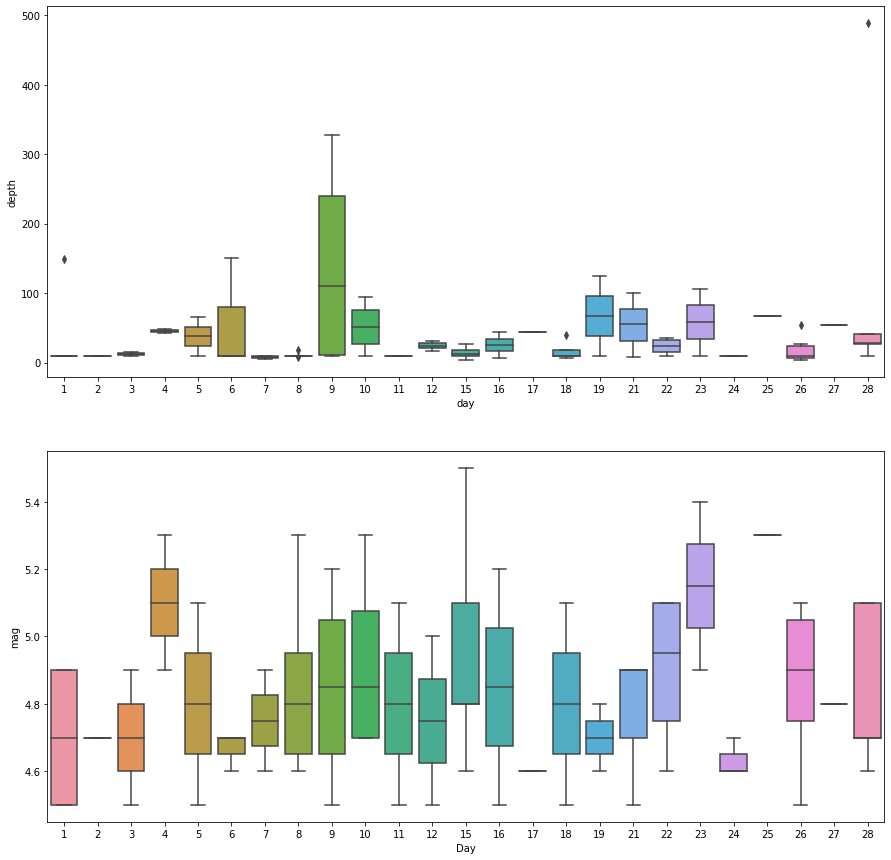

In [22]:
f, axes = plt.subplots(2, 1, figsize=(15,15))
sns.boxplot(x=df_2011['day'],y='depth',data=df_2011, orient='v', ax=axes[0])
sns.boxplot(x= 'day', y='mag', data=df_2011, orient='v', ax=axes[1])
plt.xlabel('Day')

* February Depth & Magnitude

* Same graphs for 2011 March

   latitude  longitude  depth  mag magType    nst    gap  dmin   rms net  ...  \
0    37.834    143.358   35.0  4.8      mb  178.0   39.8   NaN  0.91  us  ...   
1    38.224    141.895   55.5  4.5      mb   51.0  120.0   NaN  1.03  us  ...   
2    37.683    144.252   35.0  4.5      mb   31.0  135.4   NaN  1.02  us  ...   
3    37.405    142.027   35.0  4.6      mb   19.0  135.4   NaN  1.14  us  ...   
4    40.096    143.273   59.8  4.6      mb   21.0  241.9   NaN  0.86  us  ...   

  magError magNst    status locationSource  magSource  \
0      NaN   98.0  reviewed             us         us   
1      NaN   10.0  reviewed             us         us   
2      NaN    7.0  reviewed             us         us   
3      NaN    4.0  reviewed             us         us   
4      NaN    5.0  reviewed             us         us   

                          datetime  year  month day hour  
0 2011-03-31 22:25:49.010000+00:00  2011      3  31   22  
1 2011-03-31 22:16:56.920000+00:00  2011      3  31 

Text(0.5, 0, 'Day')

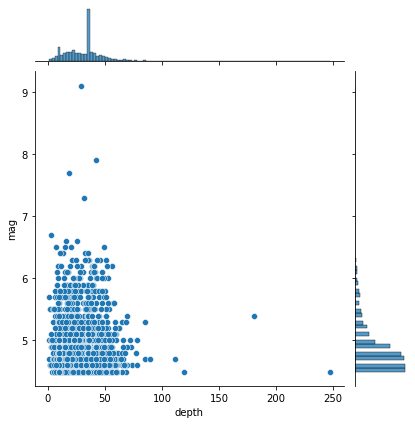

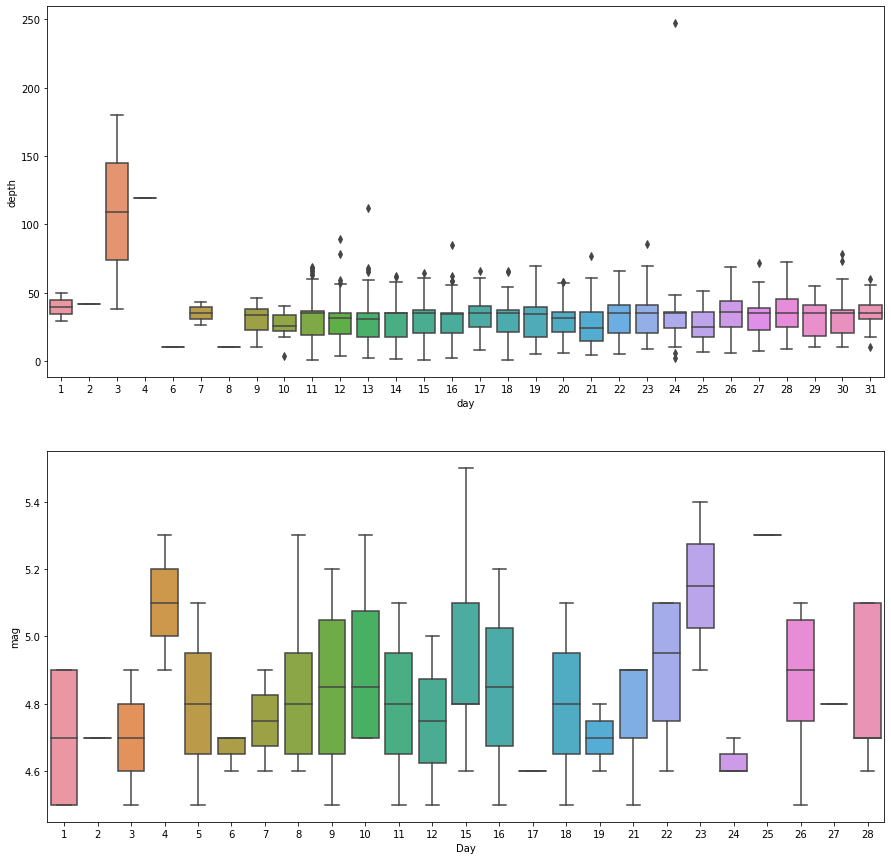

In [23]:
df_2011_march = df[(df['year'] == 2011) & (df['month'] == 3)]
df_2011_march.reset_index(drop = True, inplace = True)
print(df_2011_march.head())

sns.jointplot(x='depth',y='mag',data=df_2011_march)

f, axes = plt.subplots(2, 1, figsize=(15,15))
sns.boxplot(x=df_2011_march['day'],y='depth',data=df_2011_march, orient='v', ax=axes[0])
sns.boxplot(x= 'day', y='mag', data=df_2011, orient='v', ax=axes[1])
plt.xlabel('Day')

In [24]:
import numpy as np
import folium

map_2011_feb_march = folium.Map(location=[37, 139], zoom_start=6)

for lat, lon, mg in zip(df_2011['latitude'], df_2011['longitude'], df_2011['mag']):
    label = folium.Popup('Mag ' + ': ' + str(mg), parse_html=True)     
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        color='black',
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(map_2011_feb_march)
    
for lat, lon, mg in zip(df_2011_march['latitude'], df_2011_march['longitude'], df_2011_march['mag']):
    label = folium.Popup('Mag ' + ': ' + str(mg), parse_html=True)     
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        color='yellow',
        popup=label,
        fill=True,
        fill_opacity=0.02).add_to(map_2011_feb_march)
    
map_2011_feb_march 

In [55]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/Frightera/Earthquakes-EDA/master/Detailed%20Japan/images/1.PNG")

In [25]:
df_2011_march['month'].value_counts()

3    1984
Name: month, dtype: int64

* I also did not expect that map as I counted the values.

In [26]:
df_2011['month'].value_counts()

2    78
Name: month, dtype: int64

In [27]:
map_2011_feb_march_new = folium.Map(location=[37, 139], zoom_start=6)
mg_6 = df_2011_march.loc[df_2011_march['mag'] > 5.99]

for lat, lon, mg in zip(df_2011['latitude'], df_2011['longitude'], df_2011['mag']):
    label = folium.Popup('Mag ' + ': ' + str(mg), parse_html=True)     
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        color='black',
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(map_2011_feb_march_new)
    
for lat, lon, mg in zip(df_2011_march['latitude'], df_2011_march['longitude'], mg_6['mag']):
    label = folium.Popup('Mag ' + ': ' + str(mg), parse_html=True)     
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        color='yellow',
        popup=label,
        fill=True,
        fill_opacity=0.02).add_to(map_2011_feb_march_new)
    
map_2011_feb_march_new 

* Yellow circles = Mag >= 6.0

In [56]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/Frightera/Earthquakes-EDA/master/Detailed%20Japan/images/2.PNG")

In [28]:
df_6.reset_index(drop = True, inplace = True)

In [29]:
merge_list = [df_2011, mg_6] # march mg > 6
df_merged = pd.concat(merge_list)
df_merged.drop(['datetime'], axis = 1, inplace = True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 1966
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         140 non-null    float64
 1   longitude        140 non-null    float64
 2   depth            140 non-null    float64
 3   mag              140 non-null    float64
 4   magType          140 non-null    object 
 5   nst              140 non-null    float64
 6   gap              140 non-null    float64
 7   dmin             0 non-null      float64
 8   rms              140 non-null    float64
 9   net              140 non-null    object 
 10  id               140 non-null    object 
 11  updated          140 non-null    object 
 12  place            140 non-null    object 
 13  type             140 non-null    object 
 14  horizontalError  0 non-null      float64
 15  depthError       80 non-null     float64
 16  magError         0 non-null      float64
 17  magNst         

In [30]:
df_merged.dtypes.value_counts()

float64    12
object      9
int64       4
dtype: int64

In [31]:
df_merged_new = df_merged.loc[:, ['latitude','longitude', 'depth', 'mag', 'gap']]
df_merged_new.head()

latitude  longitude  depth  mag    gap
0    27.635    139.828  488.7  4.7   43.4
1    46.216    152.142   28.3  5.1   93.7
2    35.640    143.749   10.0  4.6  135.5
3    32.356    142.384   26.5  5.1   47.7
4    32.085    131.672   40.8  4.7  118.2

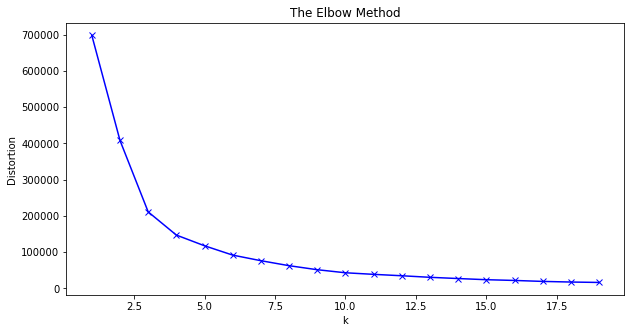

In [32]:
from sklearn.cluster import KMeans
# set number of clusters
distortions = []
K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(df_merged_new)
    distortions.append(kmean.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [33]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state= 13).fit(df_merged_new)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])
kmeans_cluster_centers = kmeans.cluster_centers_
kmeans_cluster_centers.shape

[1 2 2 0 2 2 0 2 0 0]


(4, 5)

In [34]:
df_merged_new.insert(0,'Cluster Labels', kmeans.labels_)
df_merged_new.head()

Cluster Labels  latitude  longitude  depth  mag    gap
0               1    27.635    139.828  488.7  4.7   43.4
1               2    46.216    152.142   28.3  5.1   93.7
2               2    35.640    143.749   10.0  4.6  135.5
3               0    32.356    142.384   26.5  5.1   47.7
4               2    32.085    131.672   40.8  4.7  118.2

In [35]:
from matplotlib import cm
import matplotlib.colors as colors

map_clusters1 = folium.Map(location=[37, 139], zoom_start=8)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#places_rent = folium.map.FeatureGroup()

# add markers to the map
markers_colors = []
for lat, lon, mg, cluster in zip(df_merged_new['latitude'], df_merged_new['longitude'], df_merged_new['mag'], df_merged_new['Cluster Labels'] ):
    label = folium.Popup('Cluster ' + str(cluster) +': ' + str(mg), parse_html=True)     
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-4],
        fill=True,
        fill_color=rainbow[cluster-4],
        fill_opacity=0.7).add_to(map_clusters1)
map_clusters1  

In [58]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/Frightera/Earthquakes-EDA/master/Detailed%20Japan/images/3.PNG")

In [36]:
df_merged_new.loc[df_merged_new['Cluster Labels'] == 0].describe()

Cluster Labels   latitude   longitude      depth        mag        gap
count            93.0  93.000000   93.000000  93.000000  93.000000  93.000000
mean              0.0  34.783785  141.789333  24.018280   5.765591  43.449462
std               0.0   4.962549    3.470120  14.775214   0.795844  19.705493
min               0.0  25.908000  128.281000   2.800000   4.600000   9.500000
25%               0.0  28.883000  141.720000  10.000000   5.000000  27.600000
50%               0.0  37.211000  142.648000  22.000000   6.000000  41.100000
75%               0.0  38.229000  143.351000  35.900000   6.200000  57.900000
max               0.0  44.817000  150.086000  65.300000   9.100000  83.400000

In [37]:
df_merged_new.loc[df_merged_new['Cluster Labels'] == 1].describe()

Cluster Labels   latitude   longitude       depth       mag        gap
count             2.0   2.000000    2.000000    2.000000  2.000000   2.000000
mean              1.0  29.412000  139.230500  408.450000  4.600000  64.150000
std               0.0   2.513058    0.844993  113.490638  0.141421  29.344931
min               1.0  27.635000  138.633000  328.200000  4.500000  43.400000
25%               1.0  28.523500  138.931750  368.325000  4.550000  53.775000
50%               1.0  29.412000  139.230500  408.450000  4.600000  64.150000
75%               1.0  30.300500  139.529250  448.575000  4.650000  74.525000
max               1.0  31.189000  139.828000  488.700000  4.700000  84.900000

In [38]:
df_merged_new.loc[df_merged_new['Cluster Labels'] == 2].describe()

Cluster Labels   latitude   longitude      depth        mag         gap
count            38.0  38.000000   38.000000  38.000000  38.000000   38.000000
mean              2.0  33.267789  142.249289  25.231579   4.992105  126.778947
std               0.0   6.445294    5.316248  19.244460   0.659394   31.891769
min               2.0  25.935000  128.308000   6.300000   4.500000   86.600000
25%               2.0  27.094000  142.089000  10.000000   4.600000  105.200000
50%               2.0  34.986500  143.328500  13.950000   4.700000  116.500000
75%               2.0  38.094250  143.625000  40.750000   5.050000  135.475000
max               2.0  47.279000  153.897000  70.000000   6.600000  217.700000

In [39]:
df_merged_new.loc[df_merged_new['Cluster Labels'] == 3].describe()

Cluster Labels   latitude   longitude       depth       mag         gap
count             7.0   7.000000    7.000000    7.000000  7.000000    7.000000
mean              3.0  35.974286  141.640000  133.614286  4.800000   81.742857
std               0.0   8.060626    6.933176   40.437335  0.355903   40.527475
min               3.0  24.807000  130.280000   94.700000  4.500000   28.100000
25%               3.0  31.329500  139.871500  103.100000  4.550000   51.300000
50%               3.0  33.898000  140.934000  125.100000  4.700000   98.000000
75%               3.0  41.479500  143.754000  149.700000  4.950000  104.650000
max               3.0  47.497000  153.015000  209.900000  5.400000  134.200000

### Low Dimension K-Means Visualization

In [40]:
df_merged_new['Cluster Labels'].value_counts()

0    93
2    38
3     7
1     2
Name: Cluster Labels, dtype: int64

In [41]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_merged_new)
pca_types = pca.transform(df_merged_new)
print("Variance explained by each component (%): ")

for i in range(len(pca.explained_variance_ratio_)):
      print("\n",i+1,"º:", pca.explained_variance_ratio_[i]*100)
        
print("Total sum (%): ",sum(pca.explained_variance_ratio_)*100)

print("Explained variance of the first two components (%): ",sum(pca.explained_variance_ratio_[0:1])*100)

Variance explained by each component (%): 

 1 º: 59.99452395044812

 2 º: 39.04585434133538

 3 º: 0.6988211656467634

 4 º: 0.24626394588525463

 5 º: 0.007917470556512535

 6 º: 0.00661912612796019
Total sum (%):  99.99999999999999
Explained variance of the first two components (%):  59.99452395044812


Text(0, 0.5, 'PC2')

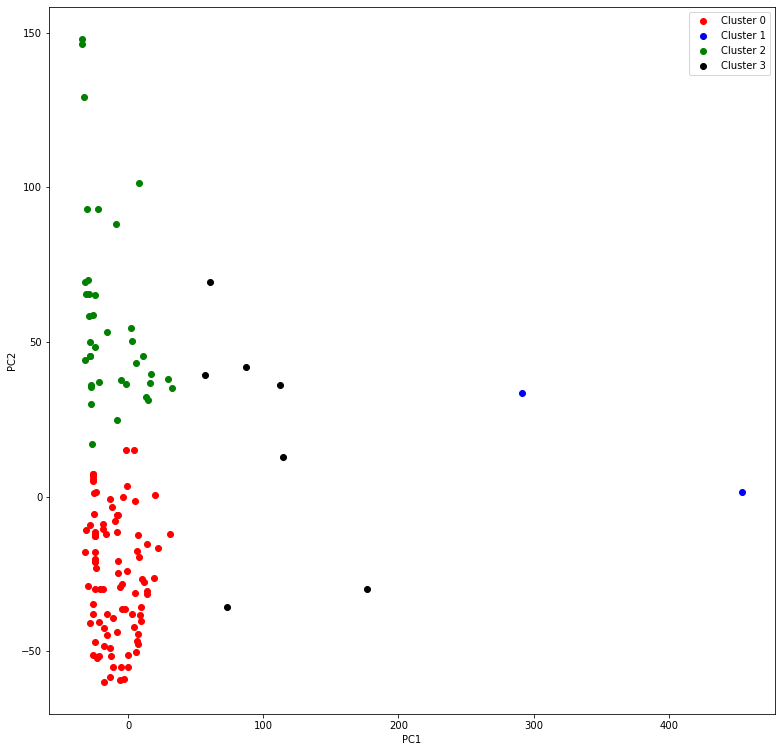

In [42]:
c0 = []
c1 = []
c2 = []
c3 = []

for i in range(len(pca_types)):
    if kmeans.labels_[i] == 0:
        c0.append(pca_types[i])
    if kmeans.labels_[i] == 1:
        c1.append(pca_types[i])
    if kmeans.labels_[i] == 2:
        c2.append(pca_types[i])
    if kmeans.labels_[i] == 3:
        c3.append(pca_types[i])
                
c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)

plt.figure(figsize=(13,13))
plt.scatter(c0[:,0], c0[:,1], c='red', label='Cluster 0')
plt.scatter(c1[:,0], c1[:,1], c='blue', label='Cluster 1')
plt.scatter(c2[:,0], c2[:,1], c='green', label='Cluster 2')
plt.scatter(c3[:,0], c3[:,1], c='black', label='Cluster 3')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

## March & February 2011, all earthquakes 

In [43]:
merge_list2 = [df_2011, df_2011_march] # march - february
df_merged_2 = pd.concat(merge_list2)
df_merged_2.drop(['datetime'], axis = 1, inplace = True)
df_merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 0 to 1983
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         2062 non-null   float64
 1   longitude        2062 non-null   float64
 2   depth            2062 non-null   float64
 3   mag              2062 non-null   float64
 4   magType          2062 non-null   object 
 5   nst              2062 non-null   float64
 6   gap              2062 non-null   float64
 7   dmin             0 non-null      float64
 8   rms              2062 non-null   float64
 9   net              2062 non-null   object 
 10  id               2062 non-null   object 
 11  updated          2062 non-null   object 
 12  place            2062 non-null   object 
 13  type             2062 non-null   object 
 14  horizontalError  0 non-null      float64
 15  depthError       1480 non-null   float64
 16  magError         0 non-null      float64
 17  magNst        

In [44]:
df_merged_new_2 = df_merged_2.loc[:, ['latitude','longitude', 'depth', 'mag', 'gap']]
df_merged_new_2.head()

latitude  longitude  depth  mag    gap
0    27.635    139.828  488.7  4.7   43.4
1    46.216    152.142   28.3  5.1   93.7
2    35.640    143.749   10.0  4.6  135.5
3    32.356    142.384   26.5  5.1   47.7
4    32.085    131.672   40.8  4.7  118.2

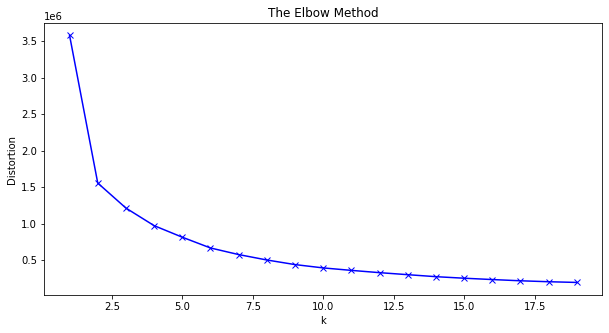

In [45]:
distortions = []

K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(df_merged_new_2)
    distortions.append(kmean.inertia_)
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [46]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state= 13).fit(df_merged_new_2)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])
kmeans_cluster_centers = kmeans.cluster_centers_
kmeans_cluster_centers.shape

[2 1 1 0 1 1 0 1 0 0]


(3, 5)

In [47]:
pca = PCA().fit(df_merged_new_2)
pca_types = pca.transform(df_merged_new_2)
print("Variance explained by each component (%): ")
for i in range(len(pca.explained_variance_ratio_)):
      print("\n",i+1,"º:", pca.explained_variance_ratio_[i]*100)
print("Total sum (%): ",sum(pca.explained_variance_ratio_)*100)
print("Explained variance of the first two components (%): ",sum(pca.explained_variance_ratio_[0:1])*100)


Variance explained by each component (%): 

 1 º: 75.34846970726312

 2 º: 24.141761213589422

 3 º: 0.3870388245409356

 4 º: 0.11688806312054269

 5 º: 0.005842191485986753
Total sum (%):  100.0
Explained variance of the first two components (%):  75.34846970726312


Text(0, 0.5, 'PC2')

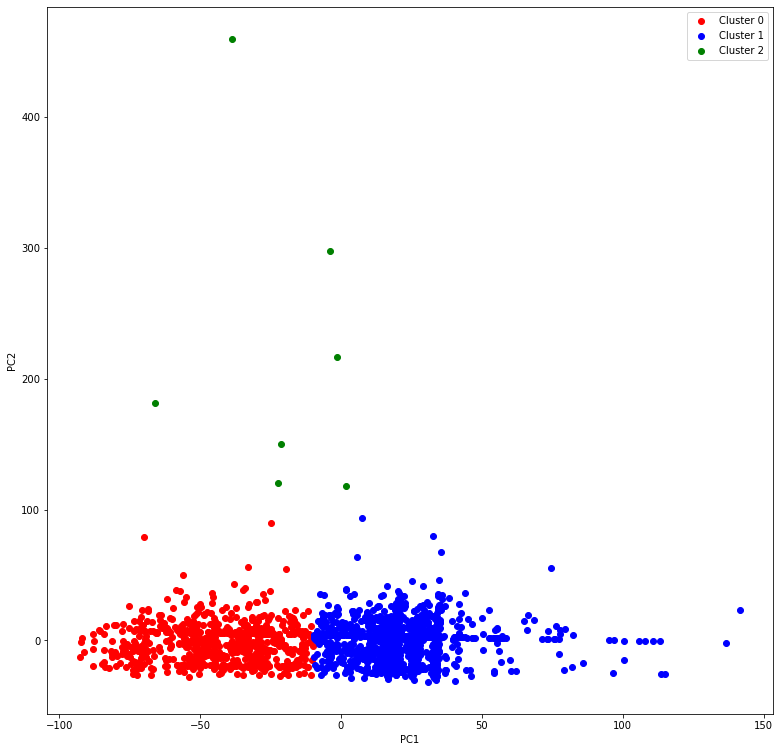

In [48]:
c0 = []
c1 = []
c2 = []

for i in range(len(pca_types)):
    if kmeans.labels_[i] == 0:
        c0.append(pca_types[i])
    if kmeans.labels_[i] == 1:
        c1.append(pca_types[i])
    if kmeans.labels_[i] == 2:
        c2.append(pca_types[i])
        
c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)

plt.figure(figsize=(13,13))
plt.scatter(c0[:,0], c0[:,1], c='red', label='Cluster 0')
plt.scatter(c1[:,0], c1[:,1], c='blue', label='Cluster 1')
plt.scatter(c2[:,0], c2[:,1], c='green', label='Cluster 2')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

In [49]:
df_merged_new_2.insert(0,'Cluster Labels', kmeans.labels_)
df_merged_new_2.head()

Cluster Labels  latitude  longitude  depth  mag    gap
0               2    27.635    139.828  488.7  4.7   43.4
1               1    46.216    152.142   28.3  5.1   93.7
2               1    35.640    143.749   10.0  4.6  135.5
3               0    32.356    142.384   26.5  5.1   47.7
4               1    32.085    131.672   40.8  4.7  118.2

In [50]:
map_clusters2 = folium.Map(location=[37, 139], zoom_start=8)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#places_rent = folium.map.FeatureGroup()

# add markers to the map
markers_colors = []
for lat, lon, mg, cluster in zip(df_merged_new_2['latitude'], df_merged_new_2['longitude'], df_merged_new_2['mag'], df_merged_new_2['Cluster Labels'] ):
    label = folium.Popup('Cluster ' + str(cluster) +': ' + str(mg), parse_html=True)     
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
map_clusters2  

In [59]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/Frightera/Earthquakes-EDA/master/Detailed%20Japan/images/4.PNG")

In [51]:
df_merged_new_2.loc[df_merged_new_2['Cluster Labels'] == 0].describe()

Cluster Labels    latitude   longitude       depth         mag  \
count           712.0  712.000000  712.000000  712.000000  712.000000   
mean              0.0   36.856857  142.424583   27.409831    5.188904   
std               0.0    2.720045    2.061380   14.815265    0.495865   
min               0.0   24.797000  125.141000    0.700000    4.500000   
25%               0.0   36.319750  141.767750   15.575000    4.900000   
50%               0.0   37.260000  142.536000   26.850000    5.100000   
75%               0.0   38.123000  143.452250   35.000000    5.500000   
max               0.0   46.259000  153.035000  119.600000    9.100000   

              gap  
count  712.000000  
mean    58.642416  
std     19.064122  
min      9.500000  
25%     46.375000  
50%     61.600000  
75%     73.200000  
max     92.100000

In [52]:
df_merged_new_2.loc[df_merged_new_2['Cluster Labels'] == 1].describe()

Cluster Labels     latitude    longitude        depth          mag  \
count          1343.0  1343.000000  1343.000000  1343.000000  1343.000000   
mean              1.0    37.423934   142.718749    31.598362     4.733805   
std               0.0     2.020639     1.682739    14.303984     0.245474   
min               1.0    24.223000   125.313000     0.700000     4.500000   
25%               1.0    36.591500   141.941000    21.600000     4.600000   
50%               1.0    37.484000   142.710000    35.000000     4.700000   
75%               1.0    38.399000   143.606000    37.300000     4.800000   
max               1.0    47.871000   155.100000   125.100000     6.600000   

               gap  
count  1343.000000  
mean    124.386150  
std      17.552626  
min      91.600000  
25%     114.700000  
50%     124.100000  
75%     134.650000  
max     241.900000

In [53]:
df_merged_new_2.loc[df_merged_new_2['Cluster Labels'] == 2].describe()

Cluster Labels   latitude   longitude       depth       mag        gap
count             7.0   7.000000    7.000000    7.000000  7.000000   7.000000
mean              2.0  34.618714  140.665286  250.542857  4.785714  70.471429
std               0.0   8.455423    6.599044  122.250806  0.367099  25.625750
min               2.0  24.807000  130.280000  149.200000  4.500000  28.100000
25%               2.0  29.412000  138.058000  165.300000  4.500000  58.500000
50%               2.0  31.204000  139.828000  209.900000  4.700000  74.300000
75%               2.0  40.261500  143.754000  287.700000  4.950000  87.950000
max               2.0  46.973000  150.925000  488.700000  5.400000  98.000000